In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv("../datasets/economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
## drop unnecessary columns
df_index.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
## Check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

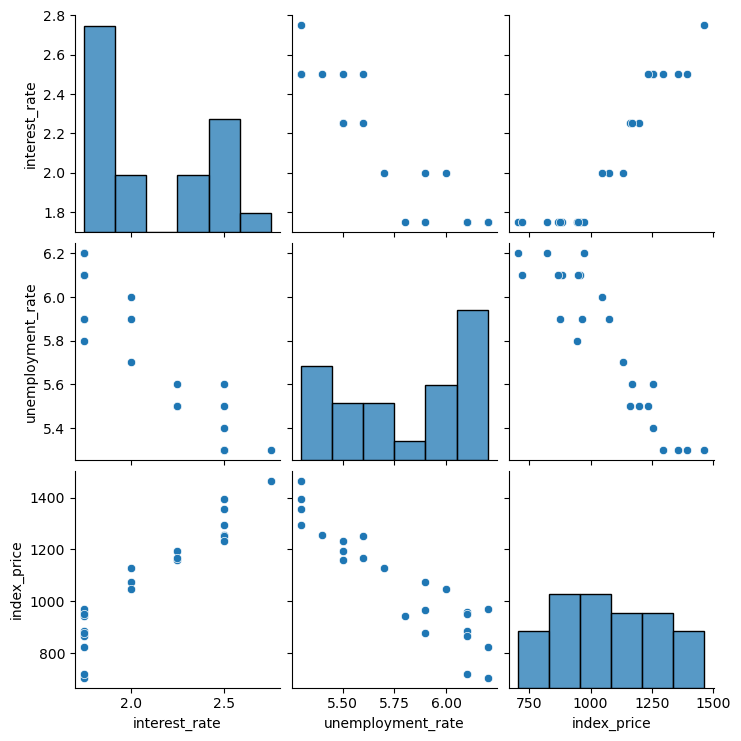

In [7]:
## Lets do some visualization
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


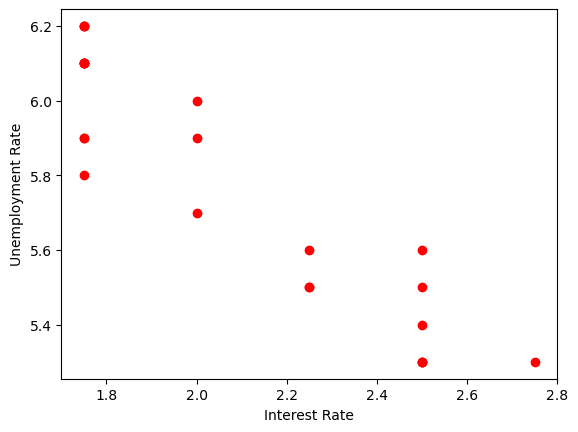

In [9]:
## Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color="r")
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")
plt.show()

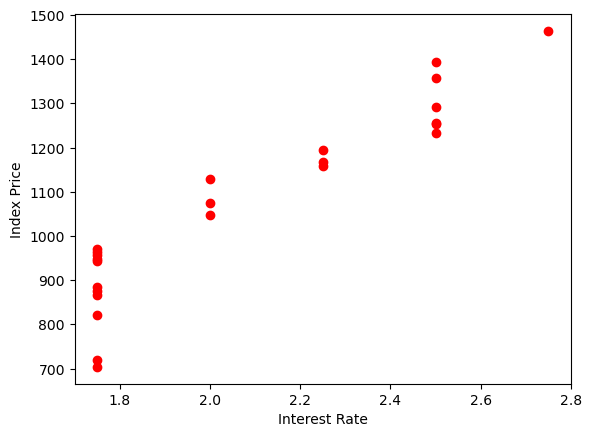

In [10]:
plt.scatter(df_index['interest_rate'], df_index['index_price'], color="r")
plt.xlabel("Interest Rate")
plt.ylabel("Index Price")
plt.show()

In [11]:
## Independent and dependent features
# X = df_index[['interest_rate', 'unemployment_rate']]
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [12]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [15]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

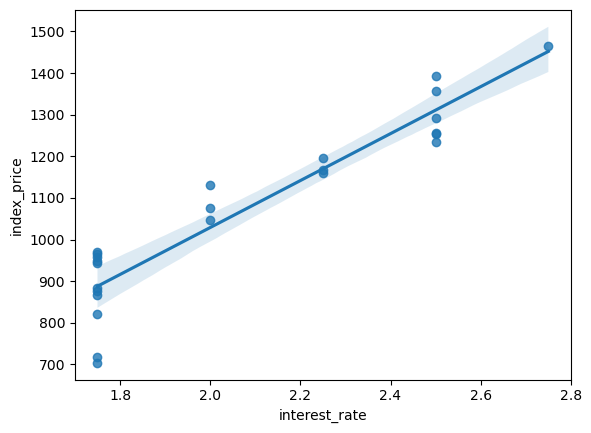

In [17]:
import seaborn as sns
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])
plt.show()

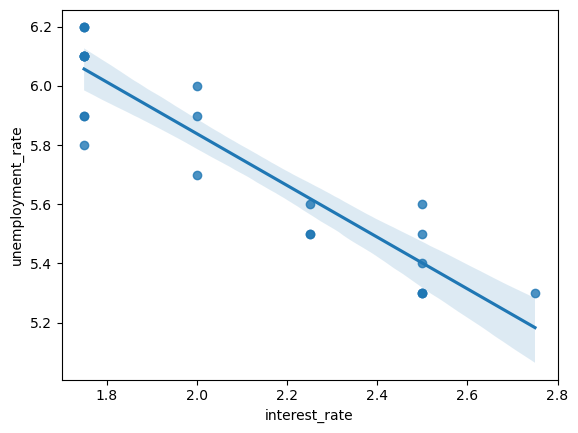

In [18]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])
plt.show()

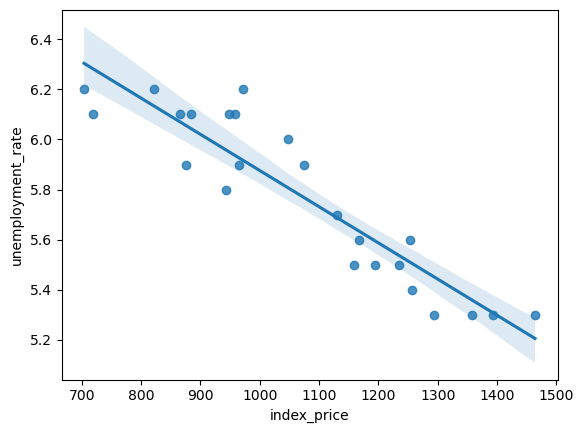

In [19]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])
plt.show()

In [20]:
## Standard scaling
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [23]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [24]:
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
## Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(
    regression, 
    X_train, 
    y_train, 
    scoring='neg_mean_squared_error',
    cv=3
)

In [27]:
np.mean(validation_score)

np.float64(-5914.828180162396)

In [28]:
## Prediction
y_pred = regression.predict(X_test)

In [29]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [30]:
## Performance Matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean Squared error: ", mse,"\n", 
      "Mean Absolute error", mae, "\n", 
      "Root Mean squared error", rmse)

Mean Squared error:  8108.567426306604 
 Mean Absolute error 73.80444932337097 
 Root Mean squared error 90.04758423359621


## R square formula
R^2 (coefficient of determination) = 1 - SSR (sum of square of residuals) / SST (total sum of squares)

In [32]:
from sklearn.metrics import r2_score

In [34]:
score = r2_score(y_test, y_pred)
print(score)

0.7591371539010257


## Adjusted R2 = 1 - [(1 - R2) * (n-1) / (n - k - 1)]
Where:

1. R2: The R2 of the model
2. n: The number of observations
3. k: The number of predictor variables

In [35]:
## display adjusted R-squared
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.5985619231683761

## Assumptions

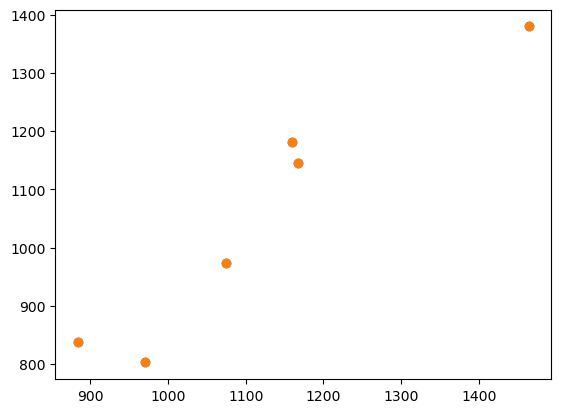

In [37]:
plt.scatter(y_test, y_pred)
plt.show()

In [38]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


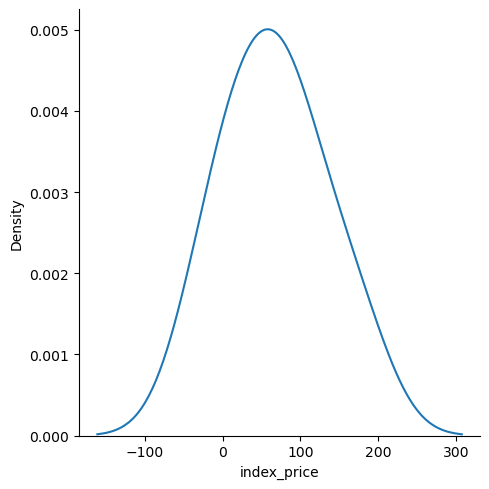

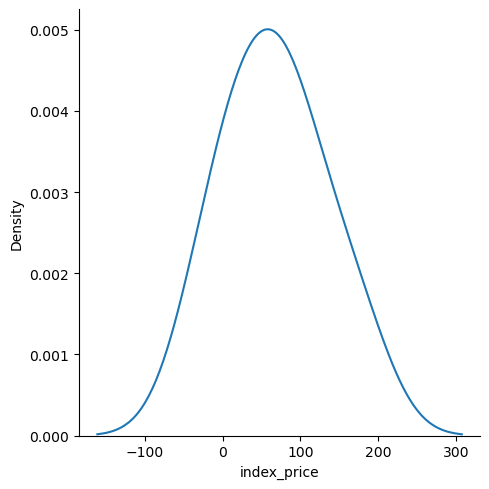

In [40]:
## Plot this residuals
sns.displot(residuals, kind='kde')
plt.show()

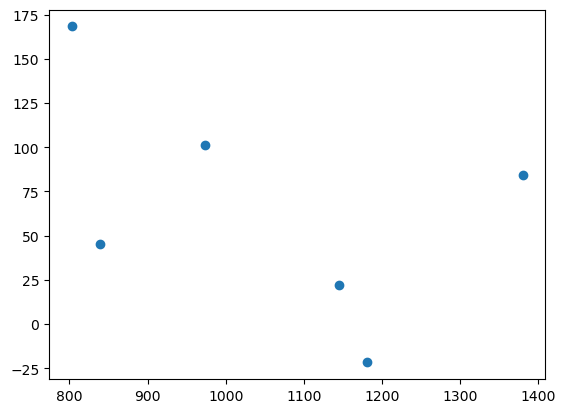

In [41]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)
plt.show()

In [42]:
## OLS Linear Regression
import statsmodels.api as sm

In [43]:
model = sm.OLS(y_train,X_train).fit()

In [44]:
prediction = model.predict(X_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [45]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 23 Aug 2025   Prob (F-statistic):                       0.754
Time:                        11:26:20   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [46]:
print(regression.coef_)

[  88.27275507 -116.25716066]
